In [1]:
import qiskit
from qiskit import assemble, QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.compiler import transpile
from random import *
from qiskit import Aer
sim = Aer.get_backend("aer_simulator")
import numpy as np
from qiskit.circuit.library.standard_gates import HGate
from qiskit.circuit.library import RZGate, RYGate

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import time
from IPython.display import clear_output

In [2]:
df = pd.read_csv('FM Monte Carlo 4x4p iterations random starting point aer_simulator.csv')
df

,Unnamed: 0,temp=0.01,temp=2.8664285714285715,temp=5.722857142857143,temp=8.579285714285716,temp=11.435714285714287,temp=14.292142857142858,temp=17.148571428571433,temp=20.005000000000003,temp=22.861428571428576,temp=25.71785714285715,temp=28.57428571428572,temp=31.43071428571429,temp=34.28714285714286,temp=37.143571428571434,temp=40.0
0,0,0.625,0.875,0.375,0.625,0.625,0.125,0.625,0.500,0.875,0.625,0.625,1.000,0.875,0.500,0.875
1,1,0.625,0.875,0.750,0.625,0.750,0.250,0.875,0.875,0.875,0.875,0.625,0.750,0.875,0.500,0.875
2,2,0.625,0.750,0.875,0.750,0.875,0.250,0.875,0.750,0.875,0.750,0.750,0.875,0.875,1.000,0.875
3,3,0.750,0.750,0.750,0.750,0.750,0.875,0.875,0.875,0.875,0.875,0.875,0.875,0.875,1.000,0.875
4,4,0.750,0.750,0.875,0.750,0.750,0.875,1.000,0.875,0.875,0.875,0.875,0.875,0.875,0.875,0.750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,1.000,0.750,0.875,0.875,0.875,0.875,0.875,0.875,0.875,0.875,0.875,0.875,1.000,0.875,0.875
9996,9996,1.000,0.750,0.750,0.750,0.875,0.750,0.875,1.000,0.750,0.875,0.875,0.750,0.875,0.750,0.750
9997,9997,1.000,1.000,0.875,0.750,0.875,0.875,0.875,0.875,0.875,0.750,0.875,0.875,0.875,0.875,0.875
9998,9998,1.000,0.875,0.750,0.875,0.875,0.750,0.875,0.875,0.875,1.000,0.875,1.000,0.750,0.875,0.875


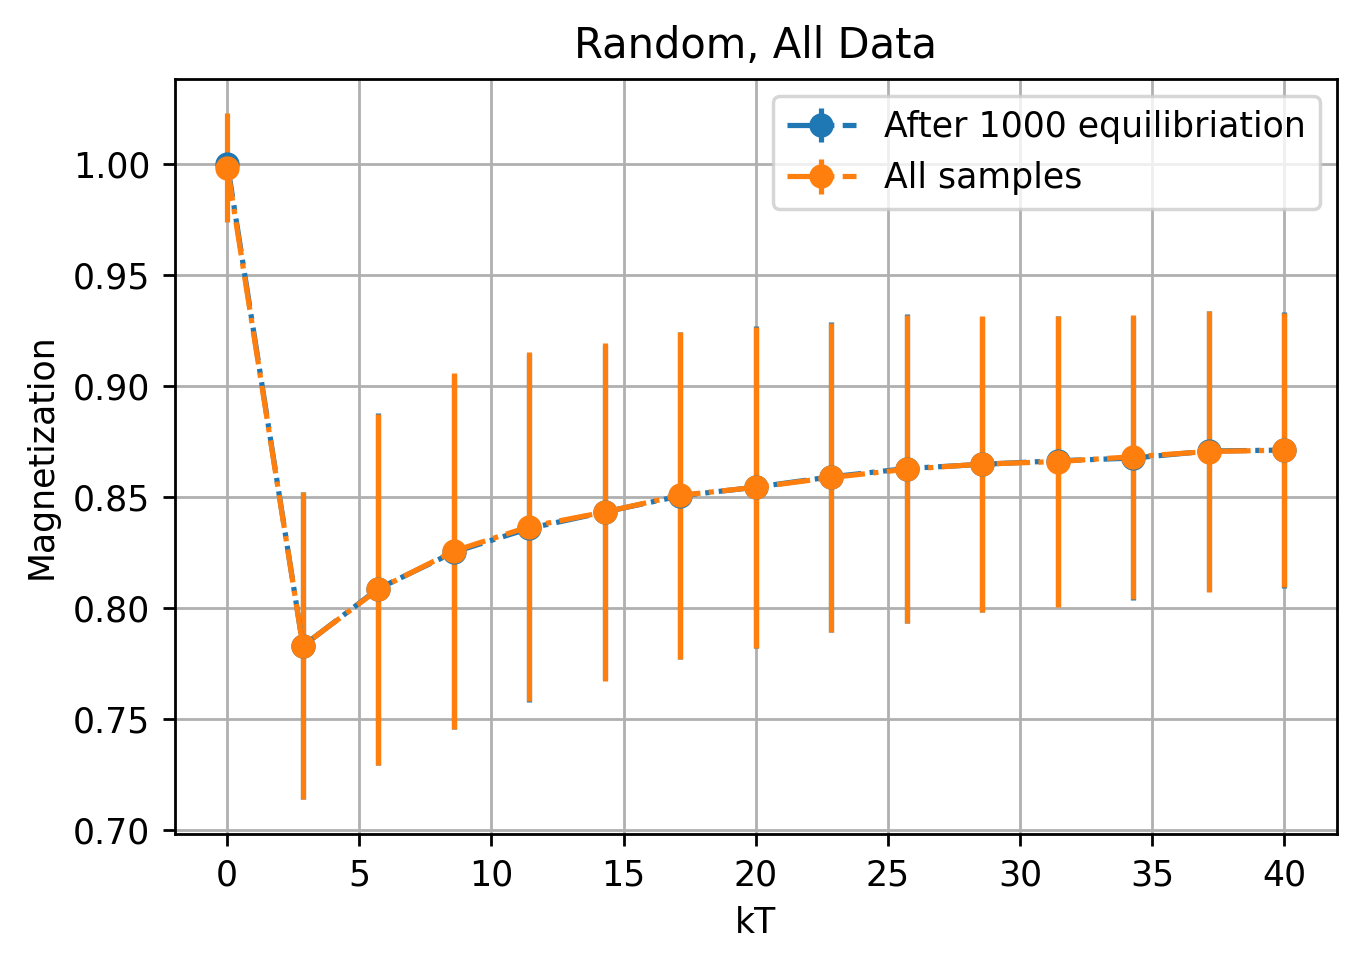

In [13]:
eqlb = 1000
keys = df.keys()[1:]
temps = np.linspace(0.01, 40, 15)
mag = []
std = []
mag1 = []
std1 = []
for key in keys:
    mag.append(np.mean(df[key][eqlb:]))
    std.append(np.std(df[key][eqlb:]))
    mag1.append(np.mean(df[key]))
    std1.append(np.std(df[key]))
    
plt.figure(dpi = 250)
plt.errorbar(temps, mag, std, linestyle='-.', marker='o', label = 'After {}'.format(eqlb) + ' equilibriation')
plt.errorbar(temps, mag1, std1, linestyle='-.', marker='o', label = 'All samples')
plt.legend()
plt.title('Random, All Data')
plt.xlabel('kT')
plt.ylabel('Magnetization')
plt.grid()

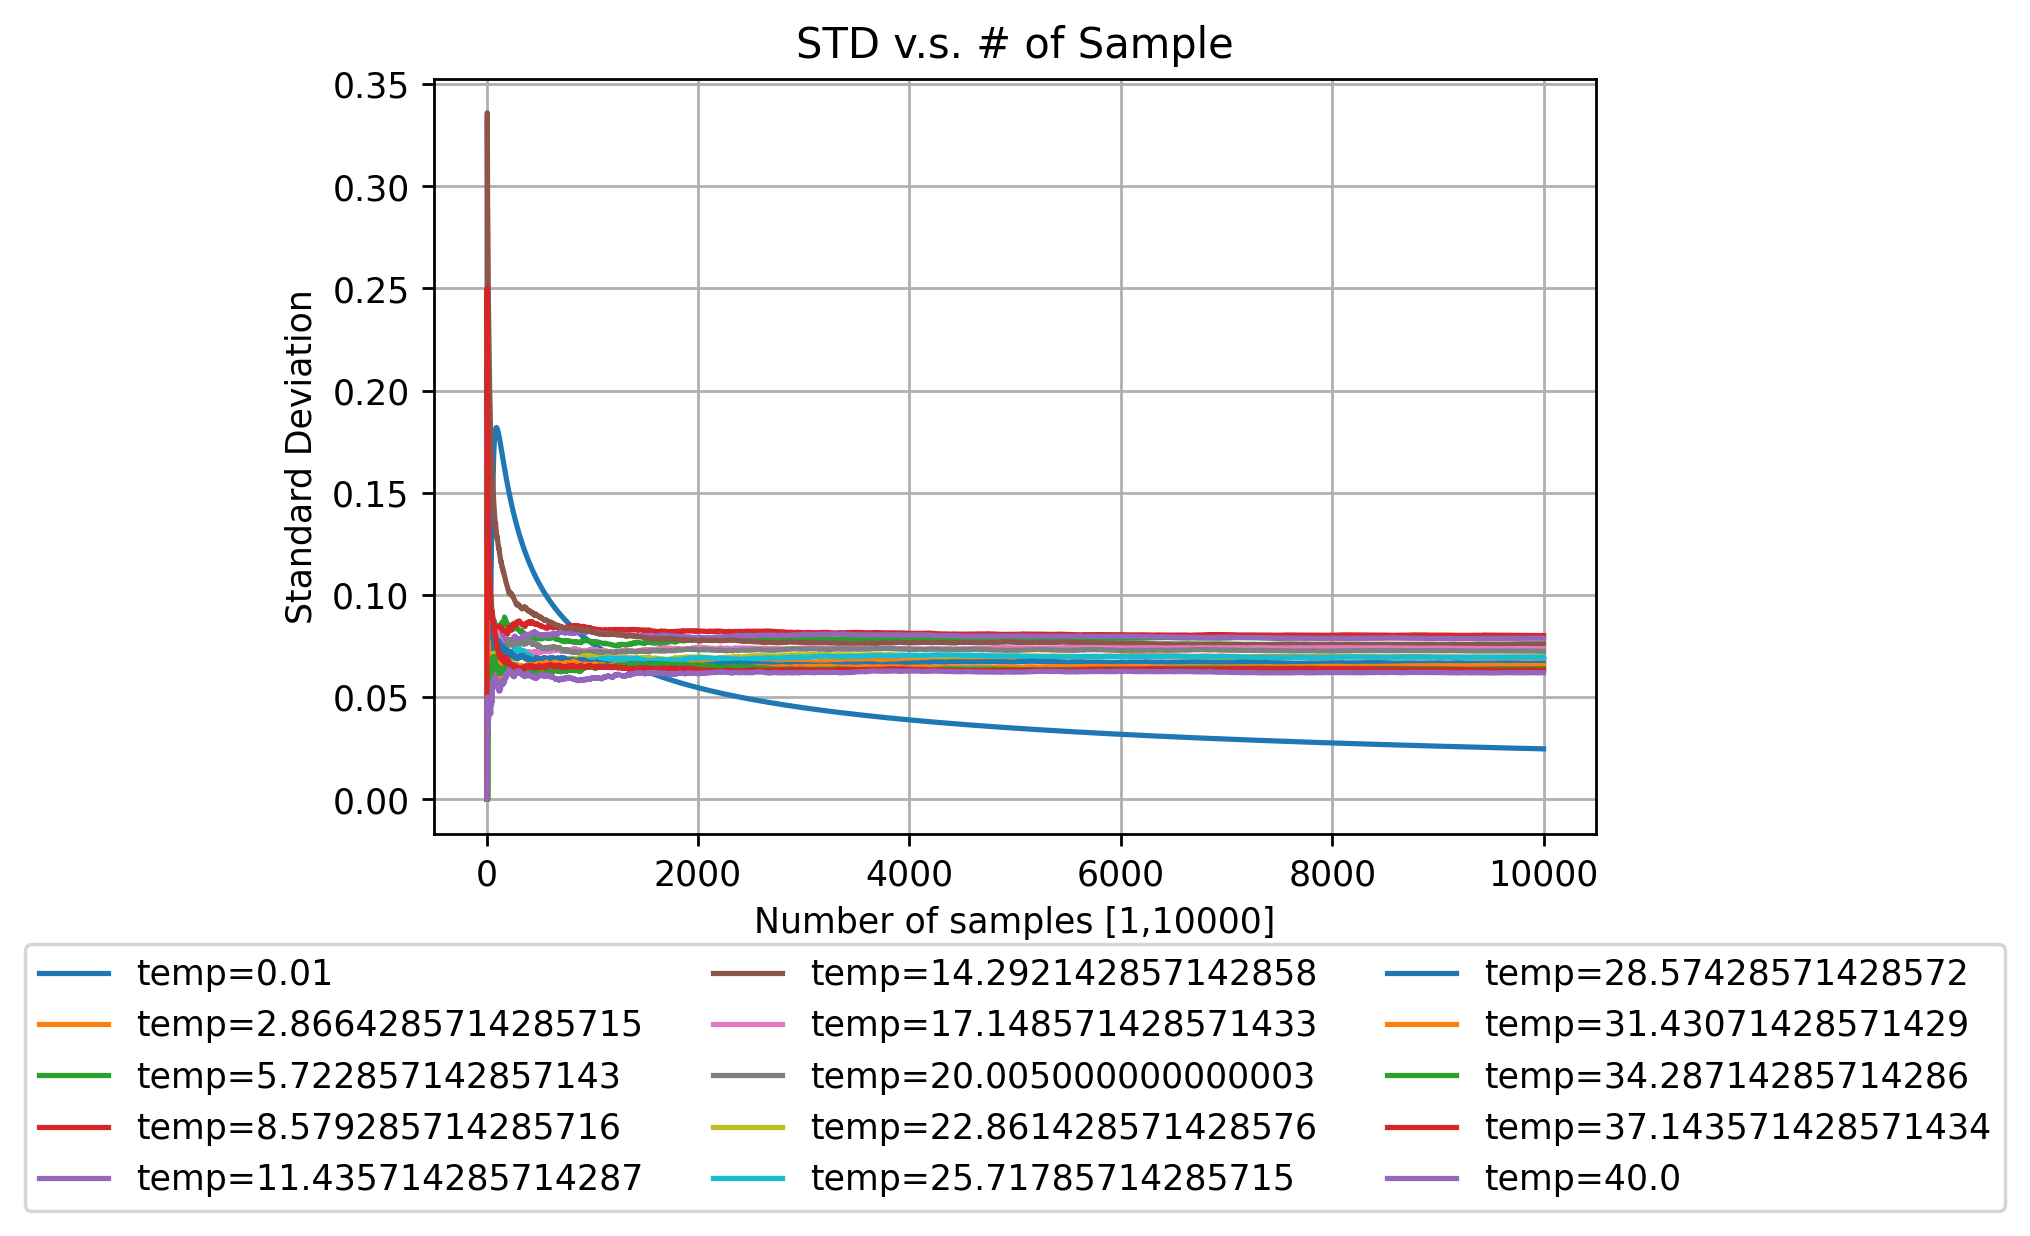

In [14]:
plt.figure(dpi = 250)

for key in keys:
    temp_data = df[key]
    std = [np.std(temp_data[:i]) for i in range(len(temp_data))]
    plt.plot(std, label = key)
    
plt.legend()
plt.title('STD v.s. # of Sample')
plt.xlabel('Number of samples [1,10000]')
plt.ylabel('Standard Deviation')
plt.legend(bbox_to_anchor=(0.5, -0.5), loc='lower center', ncol = 3, borderaxespad=0)
plt.grid()
plt.show()

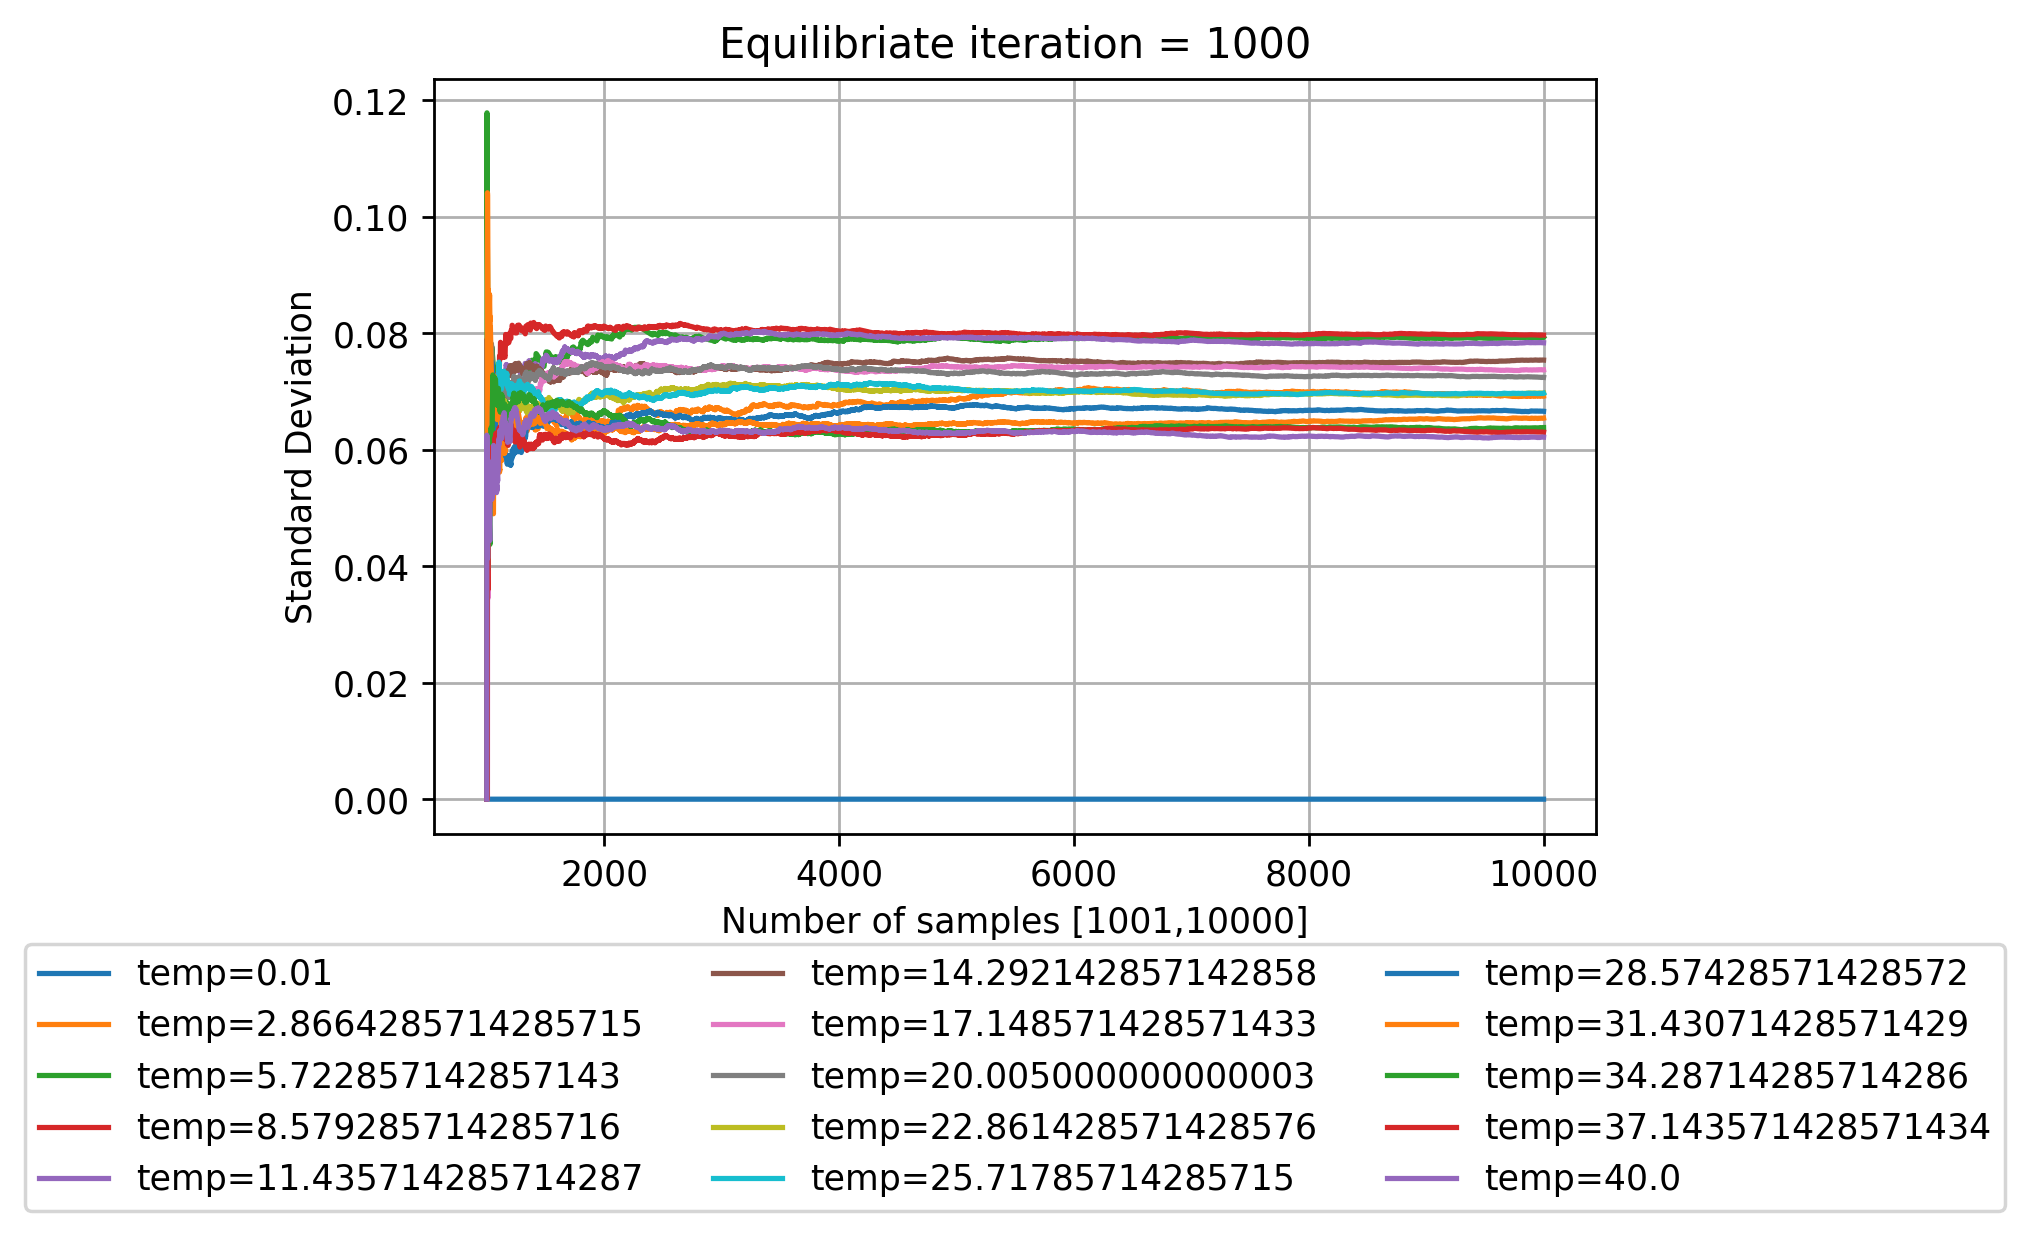

In [17]:
plt.figure(dpi = 250)
samples = np.linspace(eqlb+1, 10000, 10000-eqlb).astype('int64')
for key in keys:
    temp_data = df[key]
    std = [np.std(temp_data[eqlb:i]) for i in samples]
    plt.plot(samples, std, label = key)
    
plt.legend()
plt.xlabel('Number of samples [1001,10000]')
plt.ylabel('Standard Deviation')
plt.title('Equilibriate iteration = {}'.format(eqlb))
plt.legend(bbox_to_anchor=(0.5, -0.5), loc='lower center', ncol = 3, borderaxespad=0)
plt.grid()
plt.show()

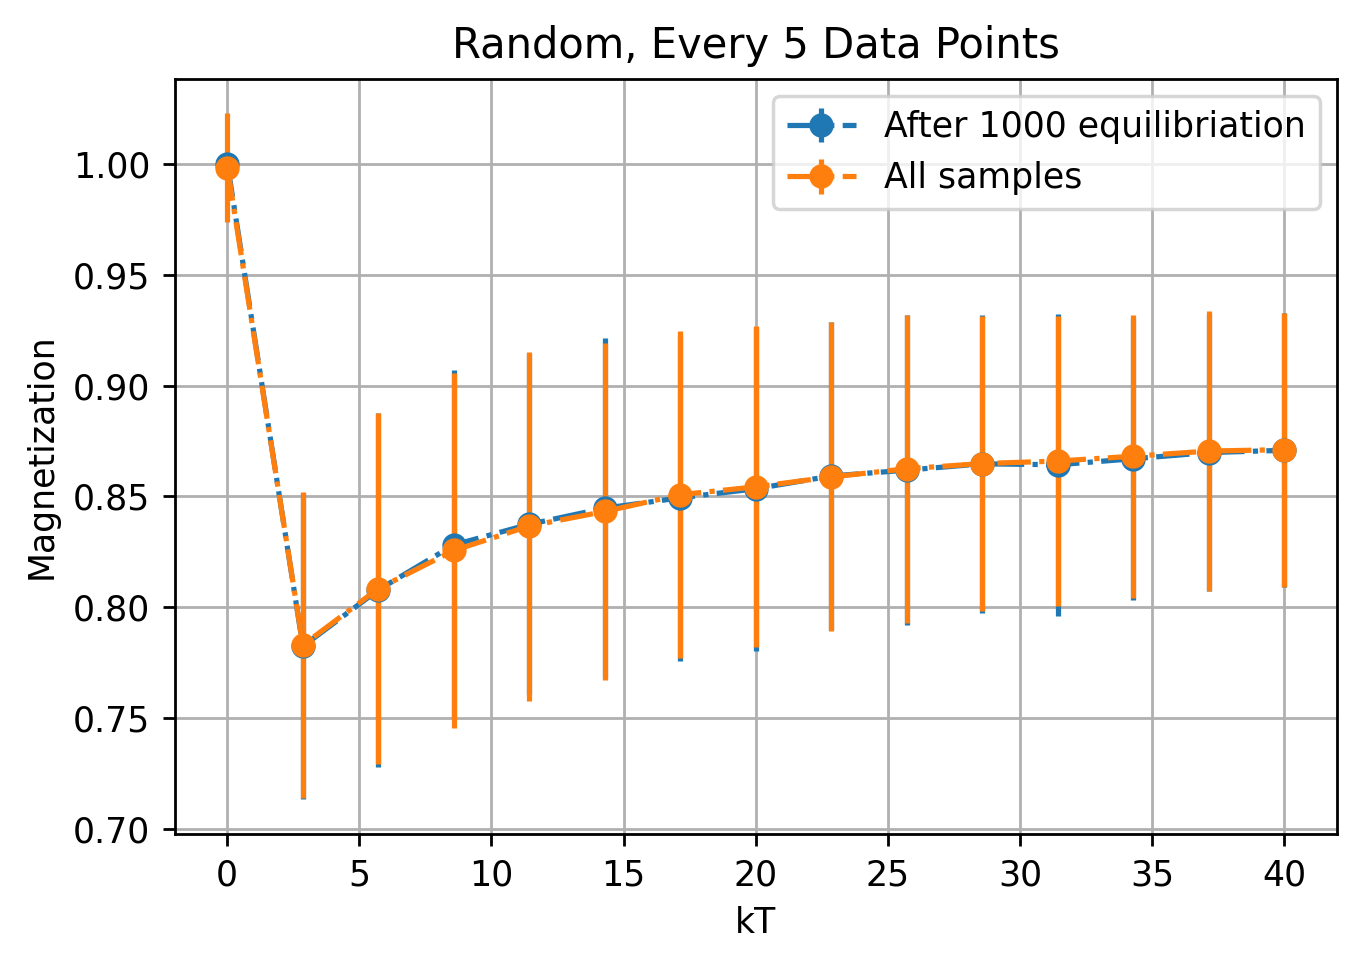

In [18]:
# Every 5th element
eqlb = 1000
keys = df.keys()[1:]
temps = np.linspace(0.01, 40, 15)
mag = []
std = []
mag1 = []
std1 = []
for key in keys:
    mag.append(np.mean(df[key][eqlb::5]))
    std.append(np.std(df[key][eqlb::5]))
    mag1.append(np.mean(df[key]))
    std1.append(np.std(df[key]))
    
plt.figure(dpi = 250)
plt.errorbar(temps, mag, std, linestyle='-.', marker='o', label = 'After {}'.format(eqlb) + ' equilibriation')
plt.errorbar(temps, mag1, std1, linestyle='-.', marker='o', label = 'All samples')
plt.legend()
plt.title('Random, Every 5 Data Points')
plt.xlabel('kT')
plt.ylabel('Magnetization')
plt.grid()

/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


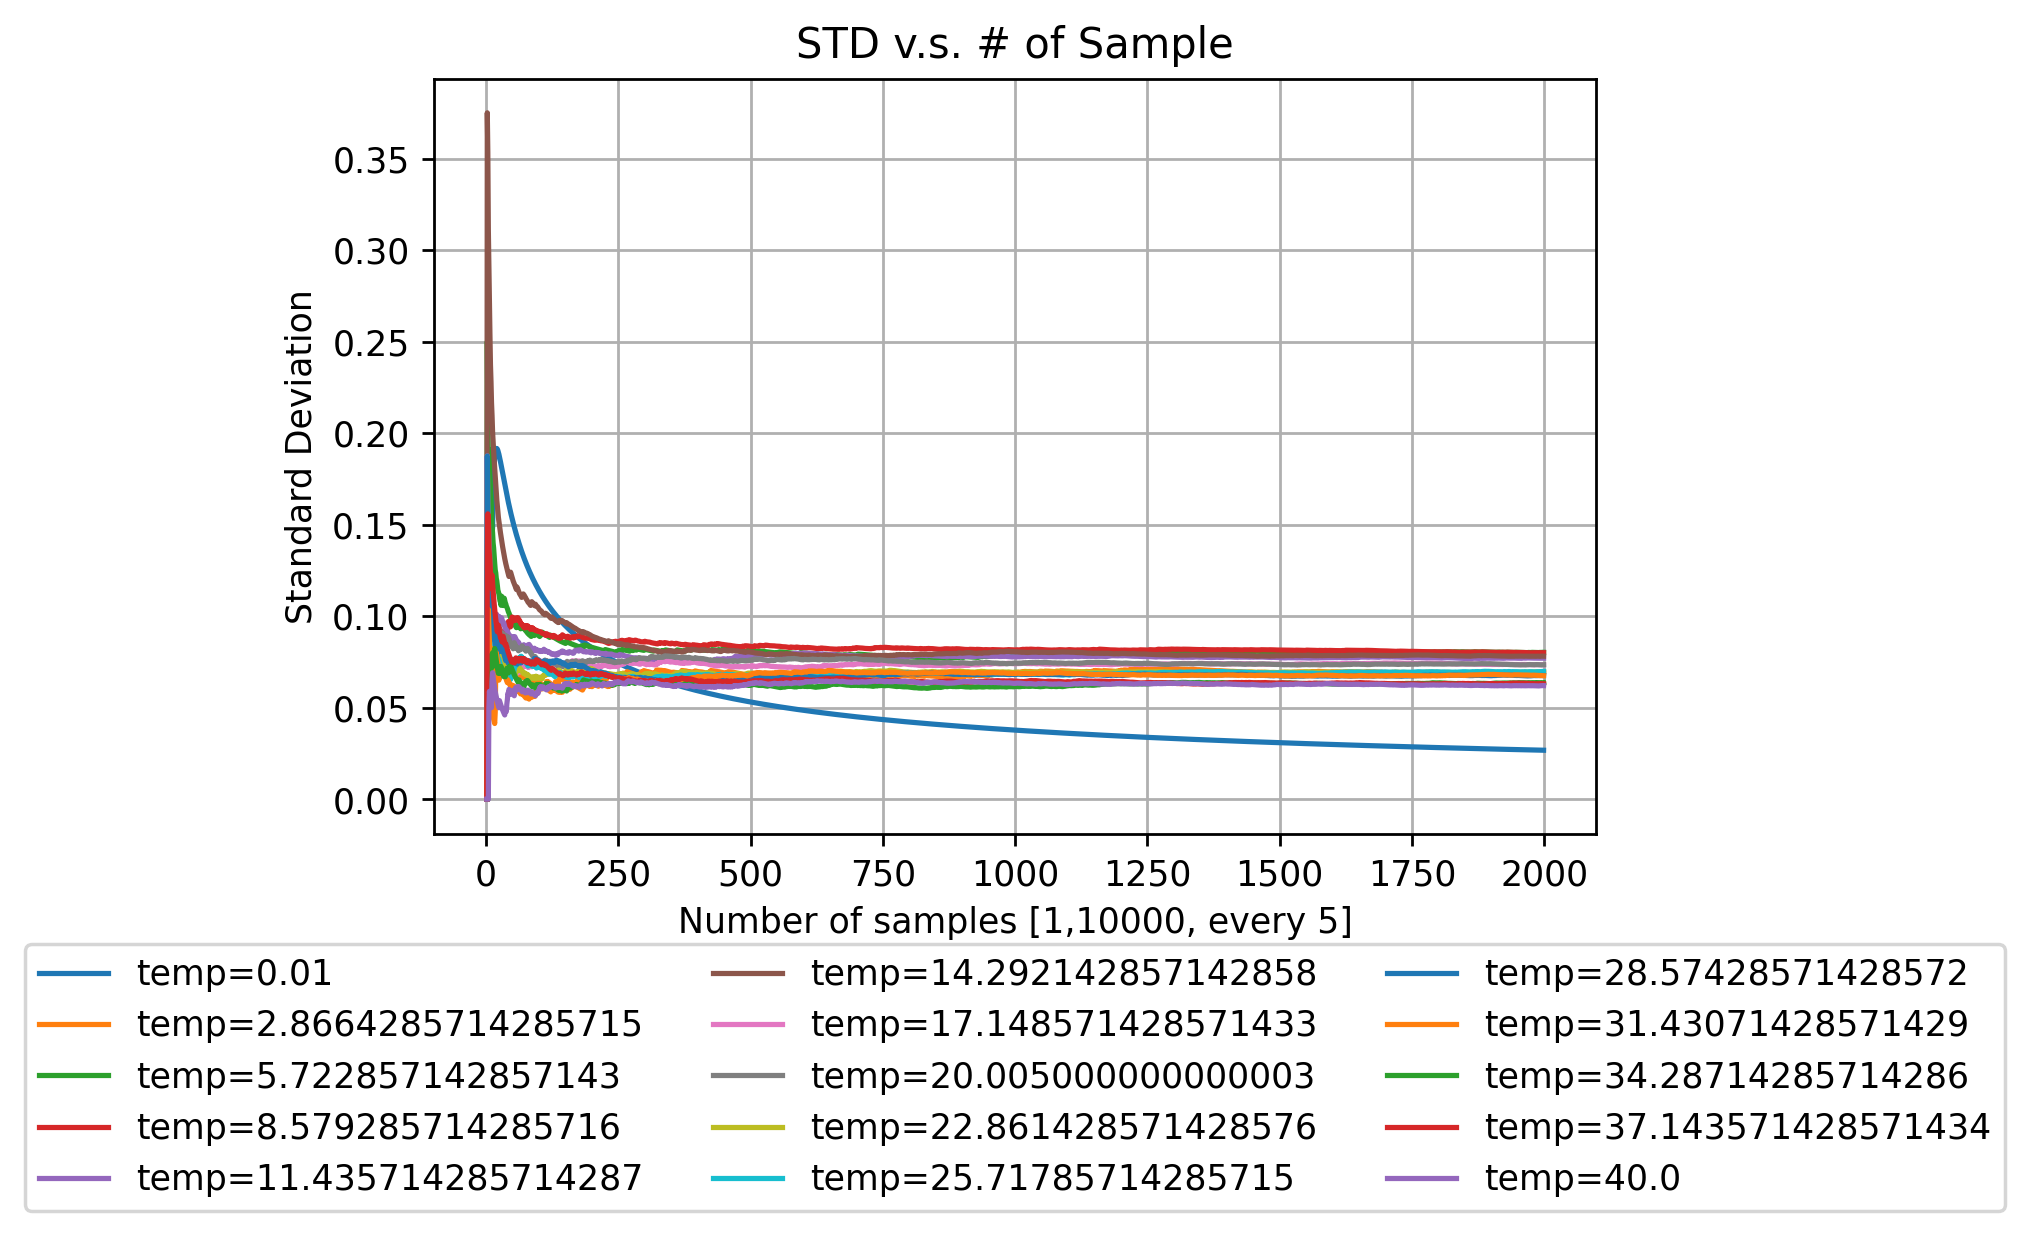

In [19]:
plt.figure(dpi = 250)

for key in keys:
    temp_data = np.array(df[key])
    temp_data = temp_data[0::5].tolist()
    std = [np.std(temp_data[:i]) for i in range(len(temp_data))]
    plt.plot(std, label = key)
    
plt.legend()
plt.title('STD v.s. # of Sample')
plt.xlabel('Number of samples [1,10000, every 5]')
plt.ylabel('Standard Deviation')
plt.legend(bbox_to_anchor=(0.5, -0.5), loc='lower center', ncol = 3, borderaxespad=0)
plt.grid()
plt.show()

1800
1800


/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid 

1800
1800
1800


/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid 

1800
1800
1800


/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid 

1800
1800


/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid 

1800
1800


/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid 

1800
1800


/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid 

1800
1800


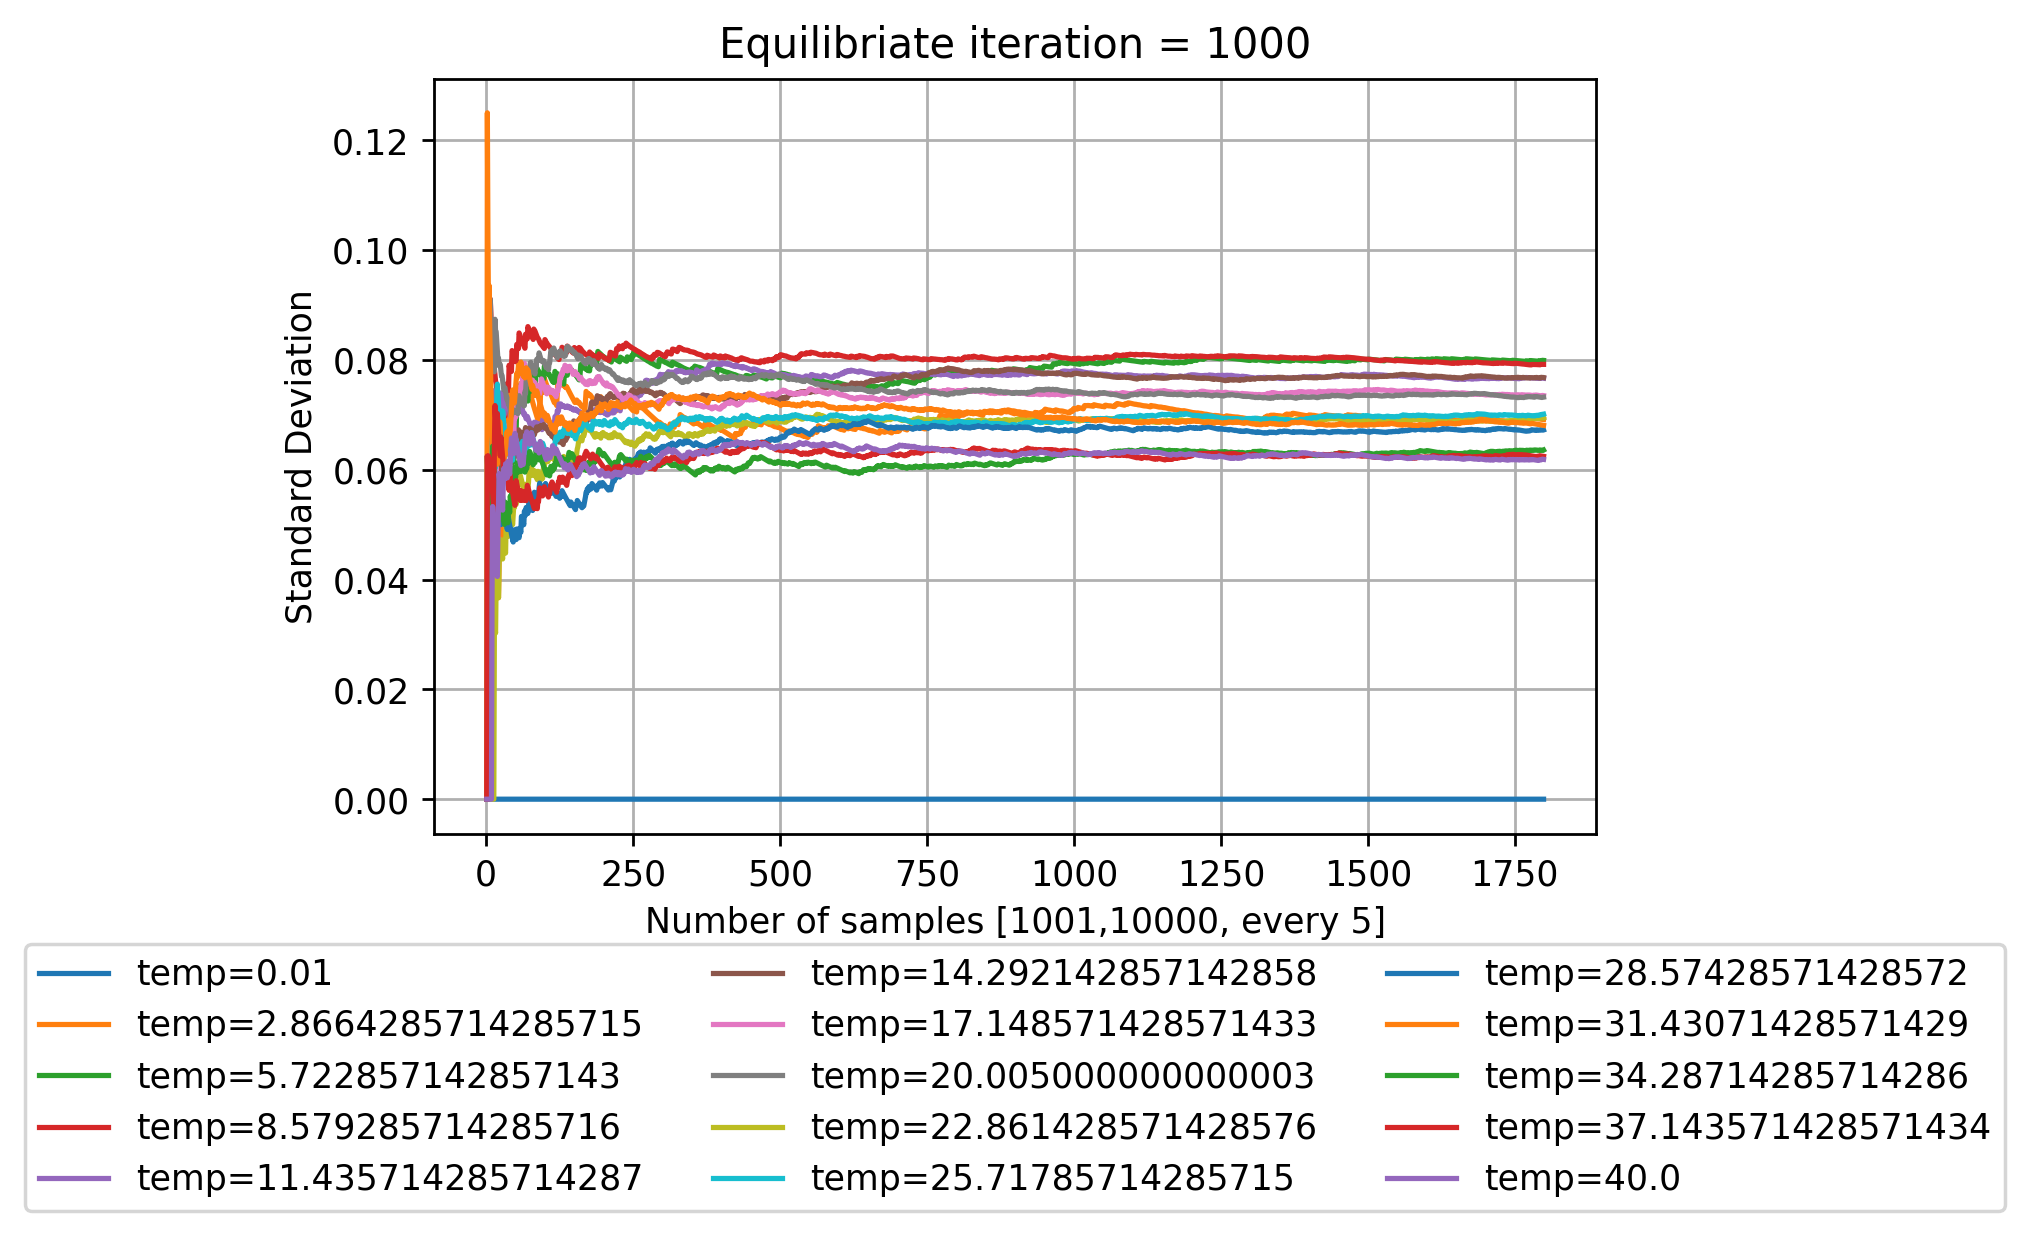

In [22]:
plt.figure(dpi = 250)
samples = np.linspace(eqlb, 9999, 10000-eqlb).astype('int64')
samples = samples[0::5].tolist()
print(len(samples))
for key in keys:
    temp_data = df[key]
    temp_data = temp_data[samples].tolist()
    std = [np.std(temp_data[:i]) for i in range(len(temp_data))]
    print(len(std))
    plt.plot(std, label = key)
    
plt.legend()
plt.xlabel('Number of samples [1001,10000, every 5]')
plt.ylabel('Standard Deviation')
plt.title('Equilibriate iteration = {}'.format(eqlb))
plt.legend(bbox_to_anchor=(0.5, -0.5), loc='lower center', ncol = 3, borderaxespad=0)
plt.grid()
plt.show()

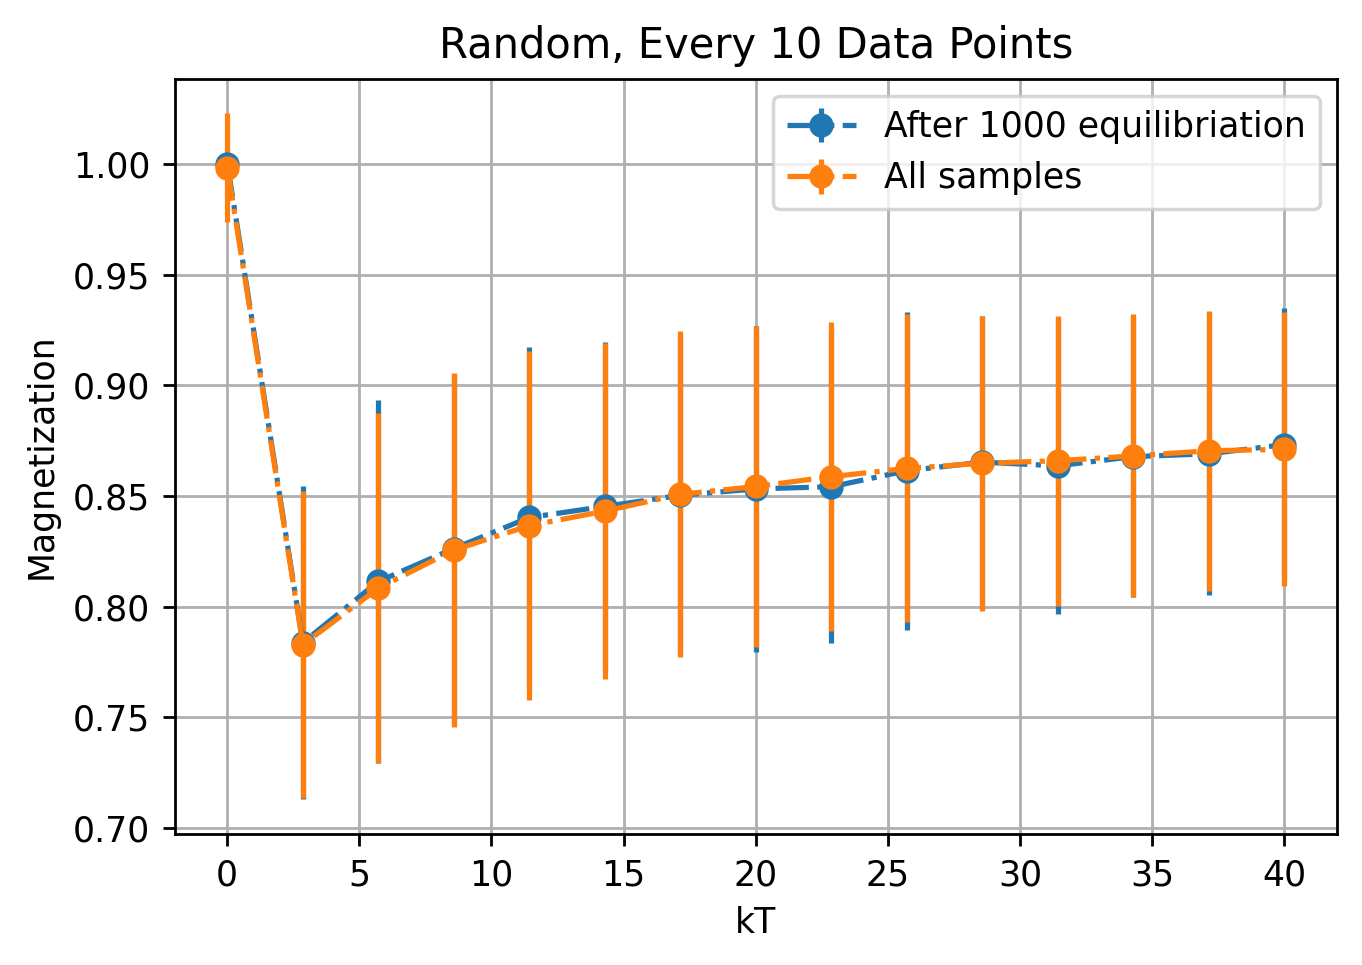

In [21]:
# Every 10th element
eqlb = 1000
keys = df.keys()[1:]
temps = np.linspace(0.01, 40, 15)
mag = []
std = []
mag1 = []
std1 = []
for key in keys:
    mag.append(np.mean(df[key][eqlb::10]))
    std.append(np.std(df[key][eqlb::10]))
    mag1.append(np.mean(df[key]))
    std1.append(np.std(df[key]))
    
plt.figure(dpi = 250)
plt.errorbar(temps, mag, std, linestyle='-.', marker='o', label = 'After {}'.format(eqlb) + ' equilibriation')
plt.errorbar(temps, mag1, std1, linestyle='-.', marker='o', label = 'All samples')
plt.legend()
plt.xlabel('kT')
plt.ylabel('Magnetization')
plt.title('Random, Every 10 Data Points')
plt.grid()

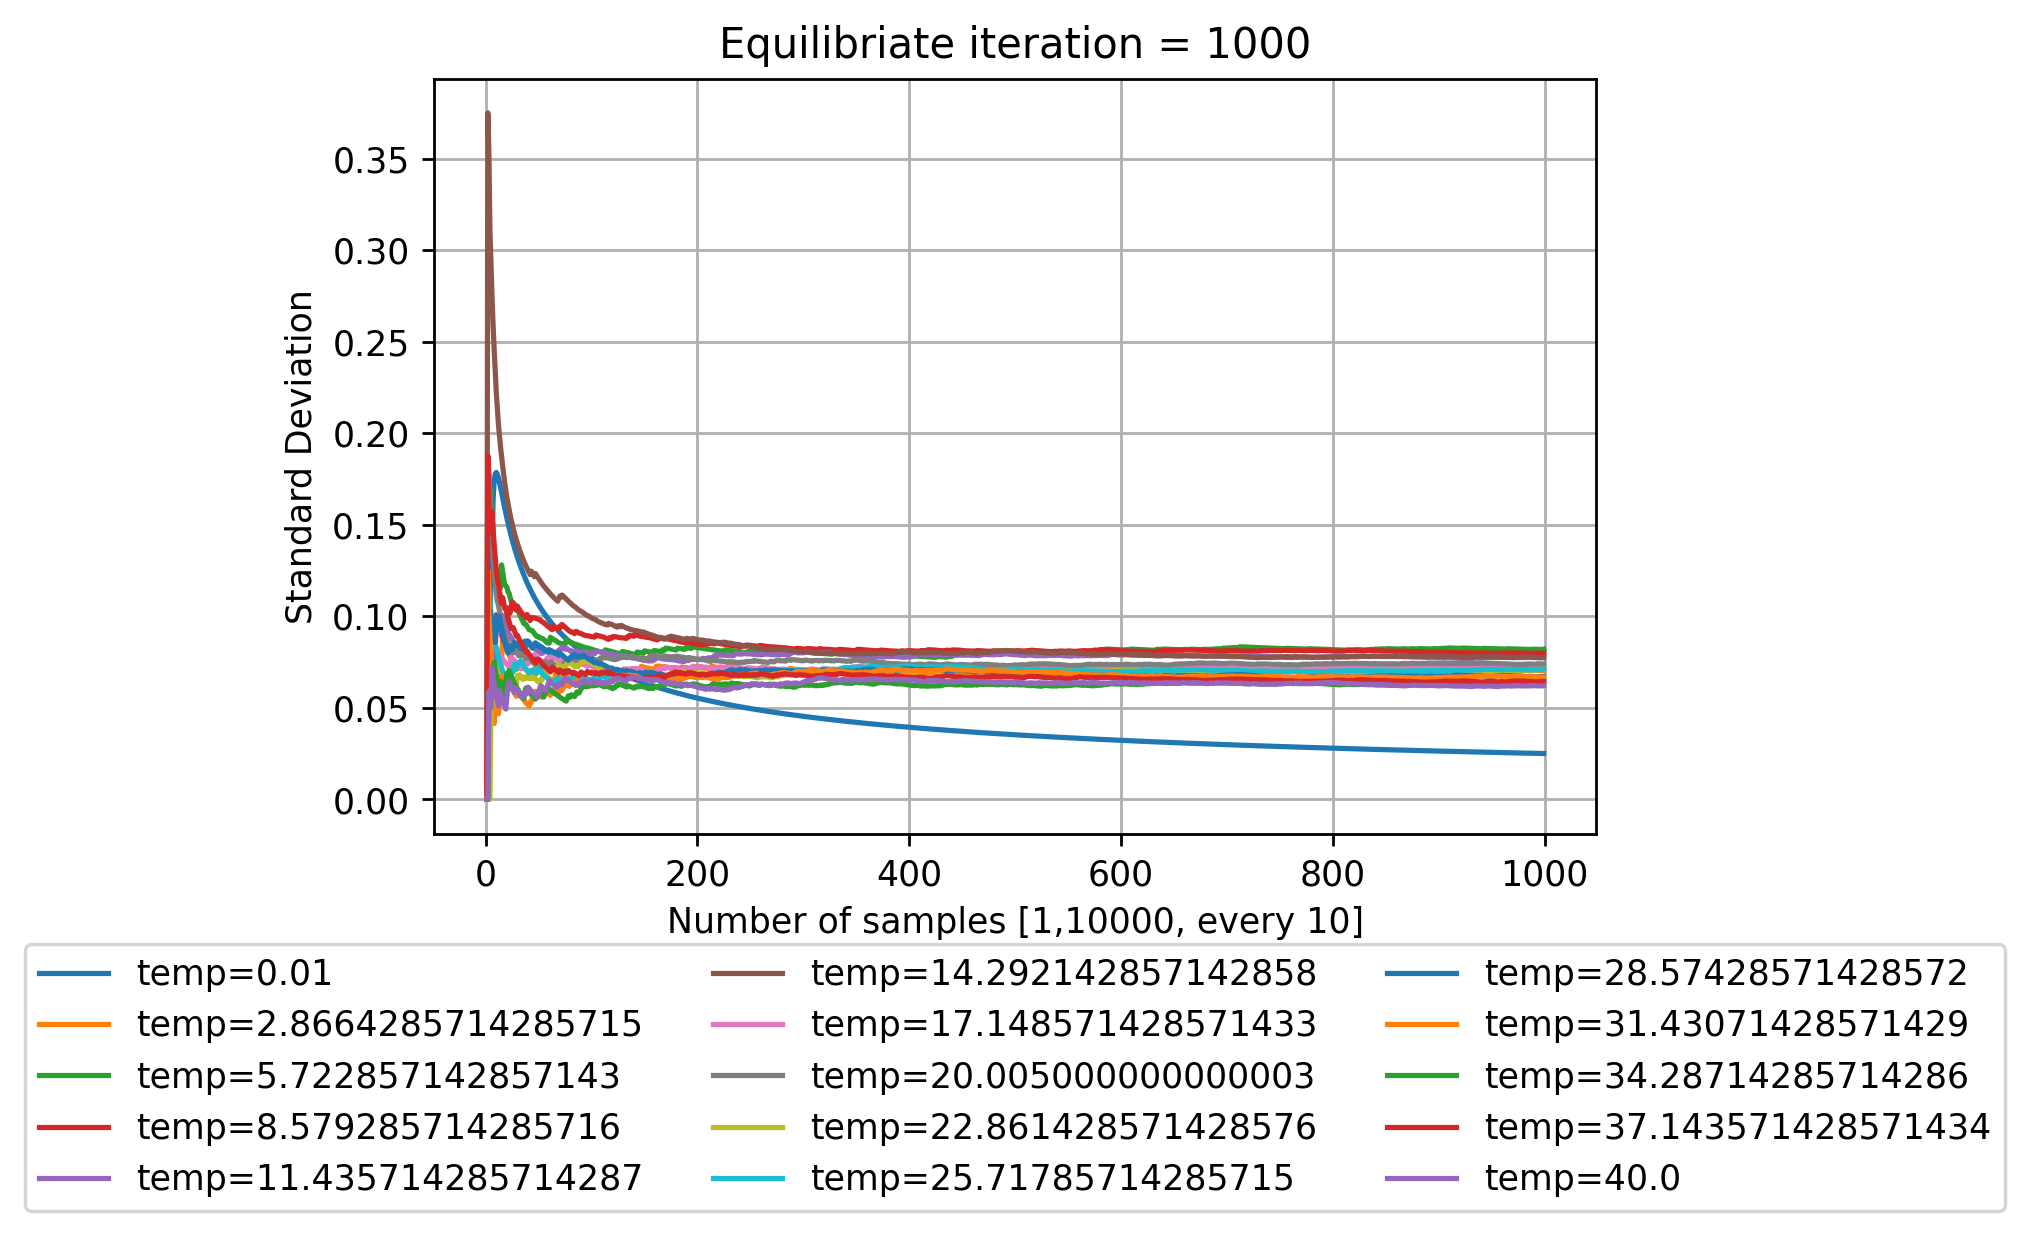

In [24]:
plt.figure(dpi = 250)

for key in keys:
    temp_data = np.array(df[key])
    temp_data = temp_data[0::10]
    std = [np.std(temp_data[:i]) for i in range(len(temp_data))]
    plt.plot(std, label = key)
    
plt.legend()
plt.xlabel('Number of samples [1,10000, every 10]')
plt.ylabel('Standard Deviation')
plt.title('Equilibriate iteration = {}'.format(eqlb))
plt.legend(bbox_to_anchor=(0.5, -0.5), loc='lower center', ncol = 3, borderaxespad=0)
plt.grid()
plt.show()

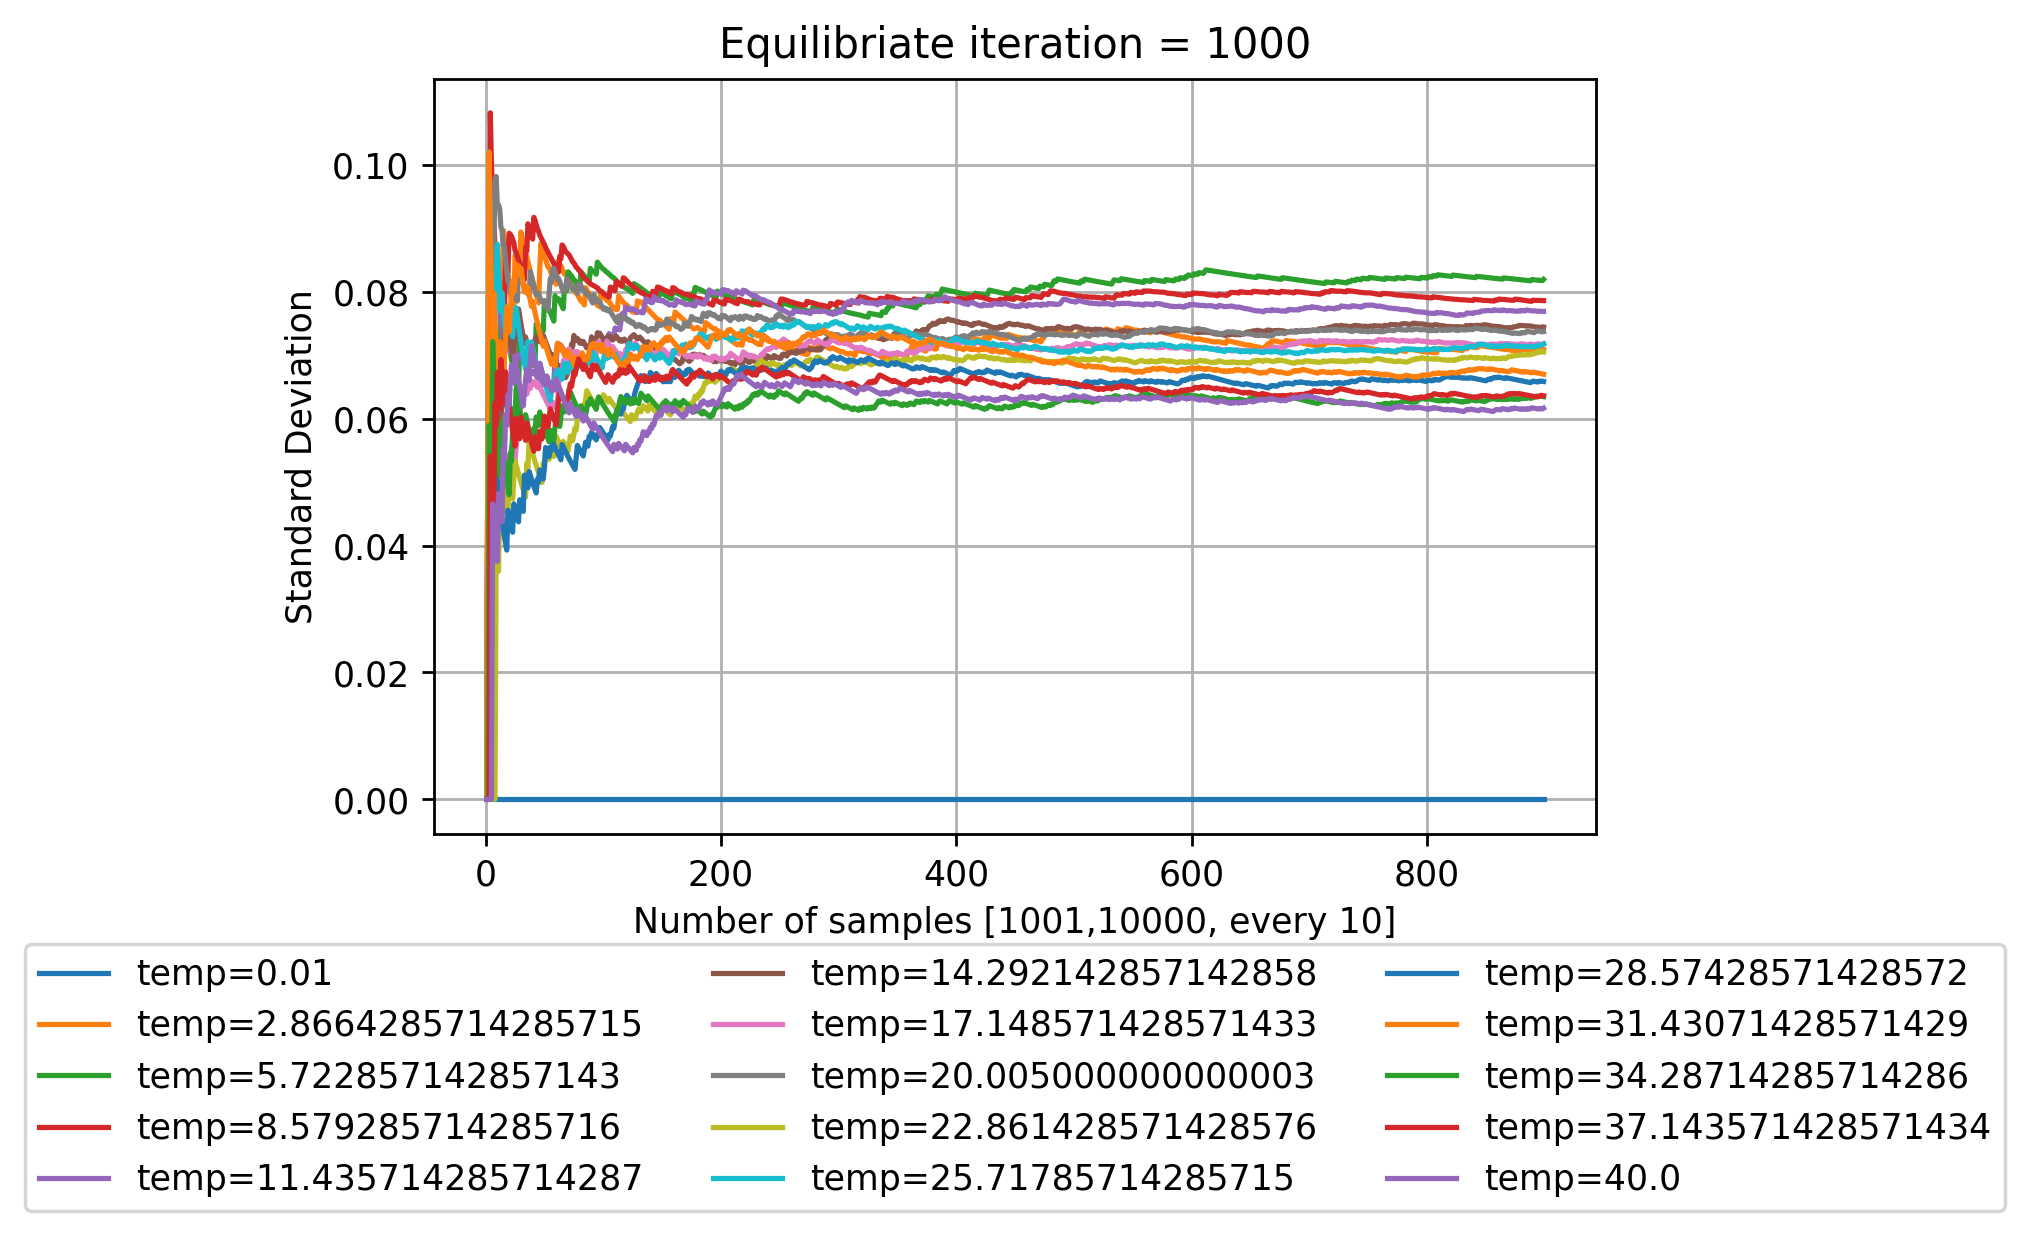

In [26]:
plt.figure(dpi = 250)
samples = np.linspace(eqlb, 9999, 10000-eqlb).astype('int64')
samples = samples[0::10]
for key in keys:
    temp_data = df[key]
    temp_data = temp_data[samples]
    std = [np.std(temp_data[:i]) for i in range(len(temp_data))]
    plt.plot(std, label = key)
    
plt.legend()
plt.xlabel('Number of samples [1001,10000, every 10]')
plt.ylabel('Standard Deviation')
plt.title('Equilibriate iteration = {}'.format(eqlb))
plt.legend(bbox_to_anchor=(0.5, -0.5), loc='lower center', ncol = 3, borderaxespad=0)
plt.grid()
plt.show()